# HW2: Exploratory Data Analysis (EDA)

## Syed Nisar Hussain

### sh07126@st.habib.edu.pk


## PART 1


In [753]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [754]:
df = pd.read_csv("FIFA_Players_Data.csv")
df.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,77-1
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,92-3,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,90+1,78+11
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
4,167495,M. Neuer,Manuel Neuer,28,3/27/1986,193,92,Germany,FC Bayern München,90,...,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,31,44+9


In [755]:
df.columns

Index(['sofifa_id', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'team_position', 'team_jersey_number', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'skill_ball_control', 'power_stamina'],
      dtype='object')

In [756]:
df.shape

(15465, 34)

In [757]:
df.dtypes

sofifa_id                     int64
short_name                   object
long_name                    object
age                           int64
dob                          object
height_cm                     int64
weight_kg                     int64
nationality                  object
club                         object
overall                       int64
potential                     int64
player_positions             object
preferred_foot               object
international_reputation      int64
weak_foot                     int64
skill_moves                   int64
work_rate                    object
body_type                    object
real_face                    object
release_clause_eur          float64
team_position                object
team_jersey_number          float64
joined                       object
contract_valid_until        float64
nation_position              object
nation_jersey_number        float64
pace                        float64
shooting                    

Since there is no proper method to estimate their stats that would make our analysis better, it is better if we remove the goalkeepers from the dataset altogether.


In [758]:
df = df[df['player_positions'] != 'GK']
df.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,77-1
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,92-3,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,90+1,78+11
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
5,176580,L. Suárez,Luis Alberto Suárez Díaz,27,1/24/1987,181,81,Uruguay,FC Barcelona,89,...,NaN,NaN,83.0,87.0,79.0,88.0,42.0,79.0,89,86


### Missing Values


In [759]:
df.isnull().sum()

sofifa_id                       0
short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
release_clause_eur          13762
team_position                 196
team_jersey_number            196
joined                       1044
contract_valid_until          203
nation_position             12844
nation_jersey_number        12844
pace                            0
shooting                        0
passing                         0
dribbling     

In [760]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing}).round(2).sort_values(by='percent_missing',ascending=False).reset_index(drop=True)
missing_value_df[missing_value_df['percent_missing'] > 0]

,column_name,percent_missing
0,release_clause_eur,100.00
1,nation_jersey_number,93.33
2,nation_position,93.33
3,joined,7.59
4,contract_valid_until,1.48
5,team_position,1.42
6,team_jersey_number,1.42


Missing `release_clause_eur` values likely indicate that these players do not have release clauses in their contract, or they aren't decided at the time of collection of this dataset. Since all of them are missing, we can safely remove this column without it impacting our analysis.


In [761]:
df.drop(columns=['release_clause_eur'], inplace=True)
df.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,77-1
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,92-3,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,90+1,78+11
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
5,176580,L. Suárez,Luis Alberto Suárez Díaz,27,1/24/1987,181,81,Uruguay,FC Barcelona,89,...,NaN,NaN,83.0,87.0,79.0,88.0,42.0,79.0,89,86


A high percentage of missig `nation_jersey_number` and `nation_position` values shows that very few players are called up for their national teams. There are also players who retire from national team to pursue club career. Instead of removing these columns, we can introduce a new category **NA** that will indicate players not playing for national team, and **0** as jersey number that will indicate that player has no national team jersey number assigned, since in soccer, the 0 number is not used.


In [762]:
df.nation_jersey_number = df.nation_jersey_number.fillna(0)
df.nation_position = df.nation_position.fillna("NA")

There is no way to get the actual joining dates or the contract validity dates for the players they're missing from. However, the approach we'll use here is to take the most commonly occuring dates (mode) to fill those missing values.


In [763]:
df.joined = df.joined.fillna(df.joined.mode()[0])

In [764]:
df.contract_valid_until = df.contract_valid_until.fillna(df.contract_valid_until.mode()[0])

### Ball Control and Stamina calculations


The way ratings work in FIFA is that the '+' or '-' sign indicates the change from the previous game, so in order to stay consistent, the calculations are performed reverse so for example, addition is performed when rating has '-' in it and vice versa. This approach also avoids cases where the rating would go below 0 if calculations were performed as is, which isn't possible.


In [765]:
# skill_ball_control
df['skill_ball_control'] = df['skill_ball_control'].str.replace('+', '-').str.replace('-', '+').apply(lambda x: eval(x) if isinstance(x, str) else x)
df['skill_ball_control'] = df['skill_ball_control'].astype(int)

# power_stamina
df['power_stamina'] = df['power_stamina'].str.replace('+', '-').str.replace('-', '+').apply(lambda x: eval(x) if isinstance(x, str) else x)
df['power_stamina'] = df['power_stamina'].astype(int)

df.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,78
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,95,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,91,89
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
5,176580,L. Suárez,Luis Alberto Suárez Díaz,27,1/24/1987,181,81,Uruguay,FC Barcelona,89,...,NA,0.0,83.0,87.0,79.0,88.0,42.0,79.0,89,86


## PART 2


### Tables


The summary tables give an interesting insight about the data.

We can see that FC Barcelona, Paris Saint-Germain (PSG), and FC Bayern make up the top 3 for both best average overall and best average potential. This indicates that these three teams are most well equipped in this game with regards to current players as well as future stars.

It can also be observed that potential ratings are much higher than the current ratings, which indicates that potential ratings solely can't give a very good way to predict future strength of the club because there are also some players who may decline and lose their overall rating which in turn can impact team's overall rating. That insight is not being captured by this data.


In [766]:
summary_table_1 = df.groupby('club').agg(
    average_overall=('overall', 'mean'),
    player_count=('overall', 'count')
).sort_values(by='average_overall', ascending=False).where(lambda x: x['player_count'] > 11).dropna().head(10)

summary_table_1

,average_overall,player_count
club,,
FC Barcelona,79.952381,21.0
Paris Saint-Germain,79.450000,20.0
FC Bayern München,78.153846,26.0
Milan,76.541667,24.0
Real Madrid,75.655172,29.0
Arsenal,75.535714,28.0
Borussia Dortmund,75.137931,29.0
Galatasaray SK,74.880000,25.0
SL Benfica,74.814815,27.0


In [767]:
summary_table_2 = df.groupby('club').agg(
    average_potential=('potential', 'mean'),
    player_count=('potential', 'count')
).sort_values(by='average_potential', ascending=False).where(lambda x: x['player_count'] > 11).dropna().head(10)

summary_table_2

,average_potential,player_count
club,,
FC Barcelona,83.857143,21.0
FC Bayern München,83.538462,26.0
Paris Saint-Germain,82.750000,20.0
Real Madrid,80.862069,29.0
Juventus,80.793103,29.0
Arsenal,80.357143,28.0
FC Porto,80.153846,26.0
Manchester City,80.000000,28.0
Borussia Dortmund,79.862069,29.0


### Univariate


The top 5 leagues in football are considered to be England, Spain, Italy, Germany, and France. It is fiiting that most players from the game are from these countries as well. Argentina is an exception, although it makes sense too since it is a very big footballing nation.

England has significantly more players, at least 500 more than Spain. One reason for this could be that FIFA games generally have more divisions of English football leagues and therefore, we see more English representation.


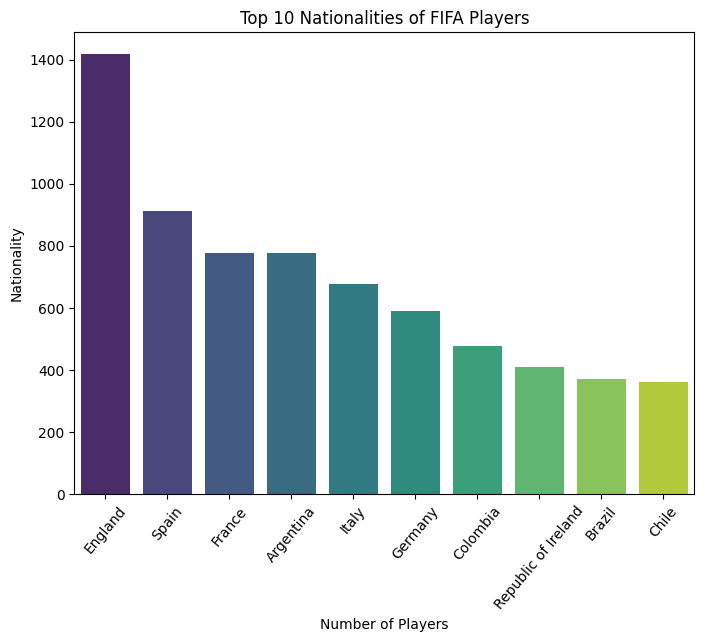

In [768]:
top_nationalities = df['nationality'].value_counts().head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette='viridis', hue=top_nationalities.index, legend=False)
plt.title('Top 10 Nationalities of FIFA Players')
plt.xlabel('Number of Players')
plt.ylabel('Nationality')
plt.xticks(rotation=50)
plt.show()


For the age distribution of players, we can observe a right skewed bell curve. From this plot, we can see that the mean age of our distribution is 23 years. This shows that the a lot of players in game are generally young and in their prime years as compared to ones nearing retirement (early to late 30s).


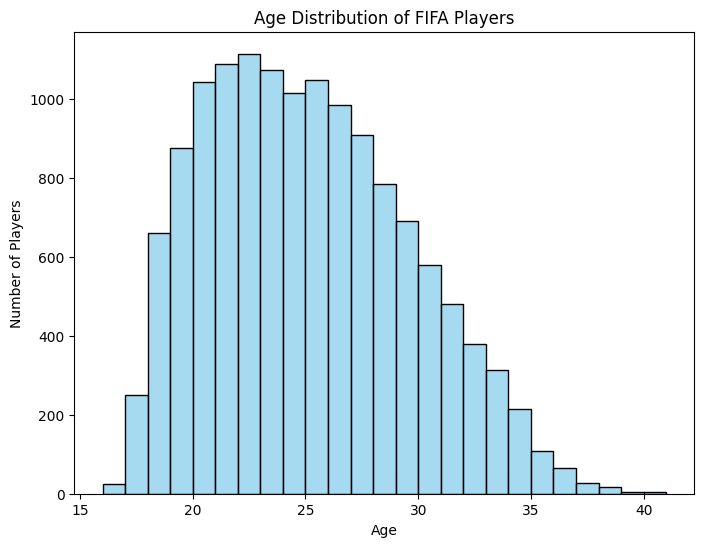

In [769]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], color='skyblue', bins=25)
plt.title('Age Distribution of FIFA Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()

### Bivariate


From this plot, we can observe that most attackers are generally decent in both pace and shooting skills. However, there are more world class runners (>90 pace) than there are world class shooters (>90 shooting).

There are also some players who are extremely slow (<50 pace) yet they are decent shooters (>70 shooting).

Only very few players are worldclass runners and shooters both.


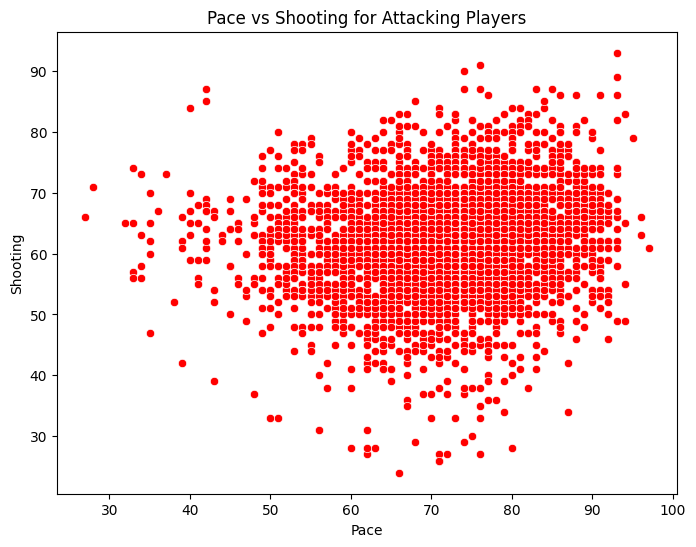

In [770]:
df_attackers = df[df['player_positions'].str.contains('ST|CF|LW|RW|LF|RF')]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='pace', y='shooting', data=df_attackers, color='red')
plt.title('Pace vs Shooting for Attacking Players')
plt.xlabel('Pace')
plt.ylabel('Shooting')
plt.show()

This plot shows us that players with high/high workrates have the most stamina, this is to be expected as players who tend to run around more on the pitch will have higher stamina. And similarly, players who have less stamina probably run less and therefore have low work rates.


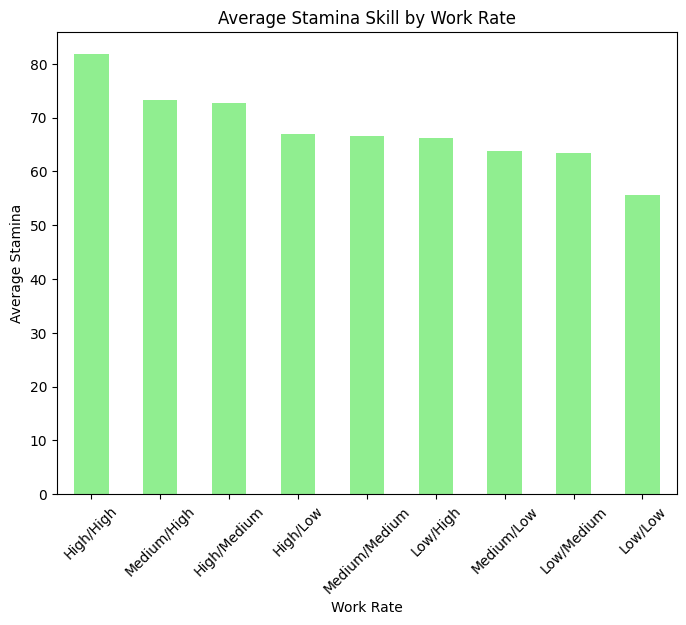

In [771]:
work_rate_group = df.groupby('work_rate').agg(average_stamina=('power_stamina', 'mean')).sort_values(by='average_stamina', ascending=False)

plt.figure(figsize=(8, 6))
work_rate_group['average_stamina'].plot(kind='bar', color='lightgreen')
plt.title('Average Stamina Skill by Work Rate')
plt.xlabel('Work Rate')
plt.ylabel('Average Stamina')
plt.xticks(rotation=45)
plt.show()

From the correlation matrix, we can observe that dribbling is highly correlated with shooting and passing, it indicates that attackers and midfielders who are good at controlling the ball, tend to excel at creating and finishing chances as well.

Defending is moderately negatively correlated with shooting, and it is understandable since highly skilled defenders aren't expected to be taking the duty of goalscoring therefore not very high shooting attributes.

Pace is moderately correlated with dribbling indicating that more often the players who can run fast on the pitch, can do well with the ball at their feet as well.


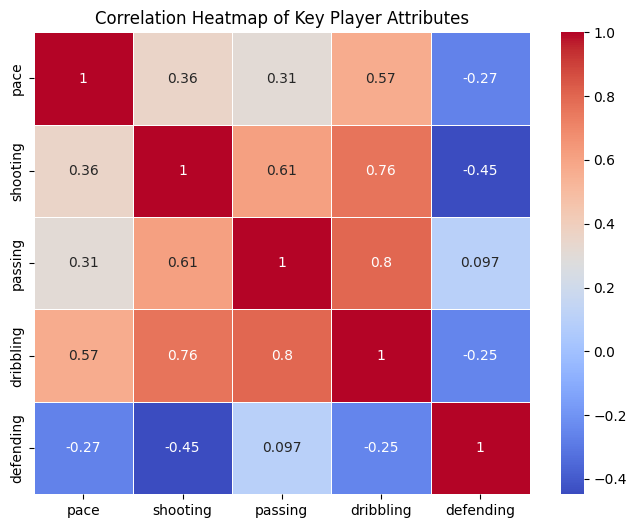

In [772]:
numeric_attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending']

plt.figure(figsize=(8, 6))
corr_matrix = df[numeric_attributes].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Player Attributes')
plt.show()


### Multivariate


From the plot, we can see that majority of the players across all body types have 2 skill moves.

It can also be noticed that stocky body types are very rare as compared to lean and normal body types. Also players with 4 or 5 star skill moves are very rare too.

As for the preferred foot, there is obviously a much larger number of right footed players however, preffered foot doesn't make such a difference since the trends are same for both.


<Figure size 800x600 with 0 Axes>

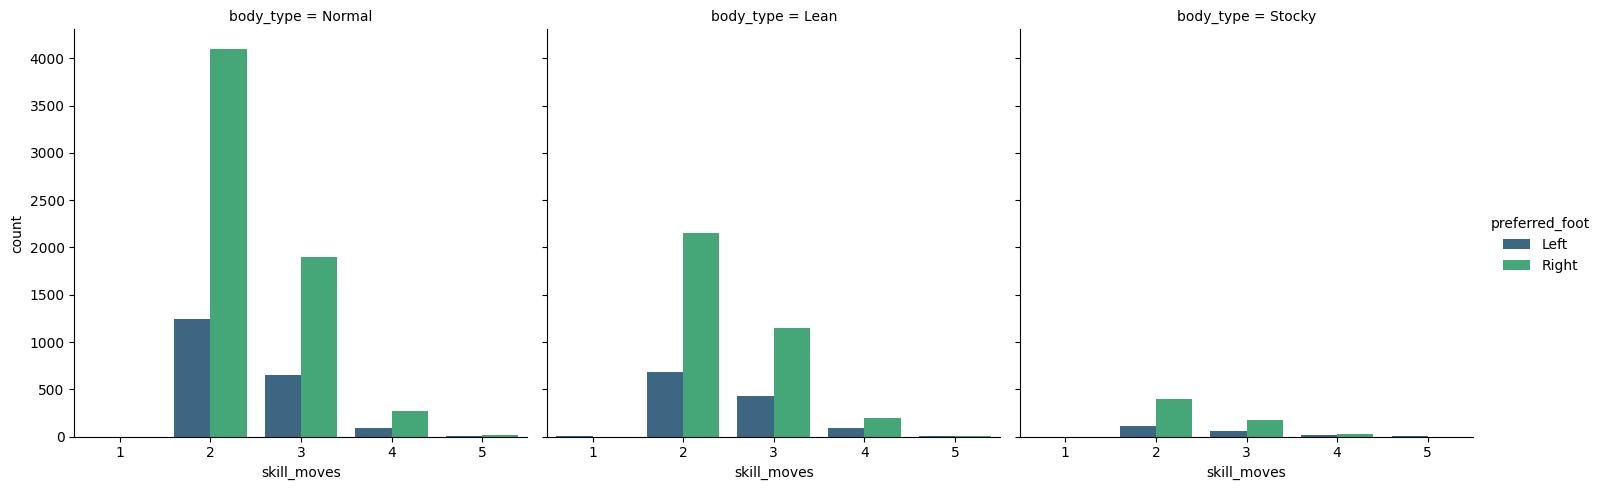

In [773]:
plt.figure(figsize=(8, 6))
sns.catplot(x='skill_moves', hue='preferred_foot', col='body_type', data=df, kind='count', palette='viridis')
plt.show()